StatQuest

# Classification tree in Python from Start to finish - Joshua Starmer

    In this lesson we Scikit learn and Cost Complexity Pruning to build this Classification Tree(below). Which uses Continious and Categorical Data from UCI Machine Learning Repository to predict whether or not a patient has  heart disease:

Classification trees are an exceptionaly useful machine learning method when you need to know how the decision are being made. For example, if you have to justify the predictions to your boss. Classification trees are good method because each step in the decision making process is easy to understand. 

In this lesson you will learn about:

-> Import data

-> Missing data

    --> Identifying Missing Data
    --> Dealing with Missing Data
   
-> Formatting the data for Decision tree

    --> Splitting the data into Dependent and Independent variables.
    --> One Hot Encoding

-> Building a preliminary Classification Tree

-> Optimizing the tree with Cost Complexity Pruning

    --> Visualizing Alpha 
    --> Using Cross Validation for finding best value for Alpha

-> Building, Drawing, Interpreting and Evaluating the Final Classification Tree

*Note:*

This Tutorial assumes that you are already know the basics of coding in python and are femiliar with theory behind the Classification trees, Cost Complex Pruning, Cross Validation, Confusion matrices, and Bias and Varience. if not check out the StatsQuest, by clicking the links for each topic.

Also Note:

I also encourage you to play around with the code. Playing with the code is the best way to learn from it.

In [1]:
import pandas as pd # load and manupulate data and for One-Hot Encoding
import numpy as np # to calculate the mean and standard deviaton
import matplotlib.pyplot as plt # to plot graphs
from sklearn.tree import DecisionTreeClassifier, plot_tree # to build classification tree and Draw the classification tree
from sklearn.model_selection import train_test_split, cross_val_score # to split data into train & test Data set and for cross validation
from sklearn.metrics import confusion_matrix, plot_confusion_matrix # to create and Draw Confusion matrix

Now import the dataset from UCI machine learnig Repository. Specifically we are going to use the Heart Disease Dataset. This dataset will allow us to predict if someone is having heart disease based on their Sex, Age, Blod pressure a veriety of other  metrics 

In [5]:
rawData = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data',
                      header=None)
# rawData = pd.read_csv('http://localhost:8888/edit/21Pypractice/Assignment/10DecisionTree/HeartDiseasedata.csv')
rawData.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
rawData.to_csv('HeartDiseasedata.csv')

We can see instead of nice column names, we just have column numbers. Since, nice column name will would make it easier to know how to format the data, let's replace the columns numbers with columns name. (source: UCI data page)

 1. age      - age in years
 2. sex      - sex (1 = male; 0 = female)
 3. cp       - chest pain type
                -- Value 1: typical angina
                -- Value 2: atypical angina
                -- Value 3: non-anginal pain
                -- Value 4: asymptomatic
 4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
 5. chol     - erum cholestoral in mg/dl
 6. fbs      - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
 7. restecg  - resting electrocardiographic results
                -- Value 0: normal
                -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
                -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
 8. thalach  - maximum heart rate achieved
 9. exang    - exercise induced angina (1 = yes; 0 = no)
10. oldpeak  - ST depression induced by exercise relative to rest
11. slope    - the slope of the peak exercise ST segment
                -- Value 1: upsloping
                -- Value 2: flat
                -- Value 3: downsloping
12. ca       - number of major vessels (0-3) colored by flourosopy
13. thal - This is short of Thalium heart diease - 3 = normal; 6 = fixed defect; 7 = reversable defect
14. HD (the predicted attribute)

In [9]:
rawData.columns = ['age',
                   'sex',
                   'cp',
                   'trestbps',
                   'chol',
                   'fbs', 
                   'restecg',
                   'thalach',
                   'exang',
                   'oldpeak',
                   'slope',
                   'ca',
                   'thal',
                   'hd']
rawData.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


hooray! Now that we have replaced column number with nice looking column names, we are ready to identify and deal with missing values if any.

# Missing Data Part 1: Identifying Missing Data

Unfortunately, the biggest part of data analysis project is making sure that the data is correctly formatted and fixing it when it is not. The first part of this process is identifying and dealing with Missing Data.

Missing data is simply is a blank space, or a surrogate value such as NA, that indicates that we failed to collect data for one of the features. For example if we forgot to ask someone's age, or forgot to write it down, then we would have a blank space in the dataset for that person's age.

There are two main ways to deal with missing data:

    1. We can remove the rows that contain missing data from the dataset. This is relatively easy to do, but it wastes all the other values that we collected. How big of a waste, this depends on, how important this value is for classification. For Example: If we are missing a value for Age and Age is not useful for classifying if people have Heart disease or not, then it would be a shame to throw out all of someone's data just because we do not have their Age.
    
    2. We can impute the values that are missing. In this context 'impute' is just a fancy way of saying 'we can make a educated guess about what the value should be'. Continuing out example where we are missing a value for age, instead of throwing out the entire row of data, we can fill the missing value with average age or median age or use some other, more sophesticated approach, to guess at an appropriate value.
    
In this section, we will focus on identifying the missing values in a dataset

First let us see what sort of data is there in each column.

In [11]:
## dtypes-Atribute will tell us about the datatype of each column in the dataset. alternatively info() will give you a 
## comprehensive information about datatypes, shape, and non-null values in the dataset, let us use dtypes
rawData.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
hd            int64
dtype: object

We see that they are allmost all float64, however, two columns 'ca','thal' are maked as object type, where as one column 'hd' is marked as int64

The fact that 'ca' & 'thal' columns have object data types suggests that there is something funny going on in them. object datatypes are used when there are mixture of things, like a mixture of number and letters. In theory, both 'ca' and 'thal' should have few unique values representing different categorical values. So, let us investigate what is going on by pring unique values. we will start  with 'ca'.

In [20]:
# print all the unique values in columns named 'ca'
# calling unique function on a column name (np.unique, np.nunique)
# print(rawData.ca.unique(),'\n',rawData.ca.nunique())
# calling value_counts() on a column (pandas function)
rawData.ca.value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

As we can see that 'ca' contains number (0.0, 3.0, 2.0, 1.0) and question marks (?). The numbers represent the number of blood vessels that we lit up by fluroscopy and the question mark represent missing data.

Now let us look at 'thal'

In [21]:
# print all the unique values in columns named 'ca'
# calling unique function on a column name (np.unique, np.nunique)
# print(rawData.thal.unique(),'\n',rawData.thal.nunique())
# calling value_counts() on a column (pandas function)
rawData.thal.value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

Again, 'thal' also contains mixture of numbers, representing the different diagnoses from the thallium heart scan, and question marks, which represent the missing values.

Now that we identified missing values we need to deal with them. 

# Missing Data Part 2: Dealing with Missing Data

Since, Scikit-learn's classification tree does not support datasets with missing values, we need to figure out what to do with these Question marks. Either we can delete them from the training dataset or impute values for the missing data. first let us see how many rows have missing values

In [26]:
# print the number of rows that contain missing values
#
# loc[] short for 'location', let us  specify which rows we want 
# and let us say we want any row with ? in 'ca' column
# OR
# any row with ? in column 'thal'

# len() short for 'length' prints the number or the count of rows that satisfy that condition

len(rawData.loc[(rawData.ca == '?')
               |
               (rawData.thal == '?')])

6

In [27]:
rawData.loc[(rawData.ca == '?')
               |
               (rawData.thal == '?')]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [28]:
len(rawData)

303

Since only 6 out of 303 rows or 2% contain missing values and we have 297 datapoints to build a classification tree we will remove the rows with missing values. Rather than try to impute their values.

Note:
Imputing Missing values is a big topic that we will tackle in anther webinar. By taking the easy route by just deleting the rows with missing values, we can stay focused on Decision trees.

We remove the rows with missing values by selecting all the rows that do not contain the ? in either 'ca' or 'thal' columns:

In [29]:
# use loc[] to select all rows that do not contain missing values. 
# and save them in a new dataframe called df_no_missing
df_no_missing = rawData.loc[(rawData.ca != '?')
                            &
                            (rawData.thal != '?')]

len(df_no_missing)

297

since, df_no_missing has 6 fewer records than original dataset, it should have 297 records.

# Format Data Part 1: Split the data into Dependent and Independent variables

Now that we have taken care of missing data, we are ready to start preparing the data for making a classification tree

The first step is to split the data into two parts:
1. The columns of Data that we will use for Classification
2. The column of data that we want to predict

We will use conventional notation of X (Capital X) to represent the columns of data that we will use to make classification and y (lower case y) to represent the thing that we want to predict. In this case we want to predict hd(heart Disease)

Note: The reason we deal with missing data before splitting the data into X and y is that if we need to remove rows, splitting after ensures that the rows in X correctly coressponds with the appropriate value in y

ALSO NOTE:
In the code below we are using copy() to copy the data by value. By default Pandas uses copy by reference. Using copy ensures that the original data df_no_missing is not modified, when we modify X and y. In other words, if we make mistake when we are formatting the columns for classfication tree, we just need to re-copy the df_no_missing, rather than reload the original dataset and remove the rows with missing values etc.

In [31]:
# make a new copy of columns used to make prediction
X = df_no_missing.drop('hd',axis=1).copy() # alternatively df_no_missing.iloc[:,:-1].copy()
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [33]:
y = df_no_missing['hd'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

Now that we have create X, which has data we want to use to make predictions, and y, which has data which we want to predict, we are ready to continue formatting X, so that it is suitable for making Decision tree

# Format the Data Part 2: One-Hot Encoding

Now that we have split the data frame into two pieces, X, which has the data we will use to make predictions/classification, and y, which contains the know classifications in our training dataset. we need to take a closer look at the variables in X. The list below tells us what each variable represents and the type of data (float or Categorical) it should contain:

1. age      - Float         - age in years
2. sex      - Category      - sex (1 = male; 0 = female)
3. cp       - Categoty      - chest pain type
                                    -- Value 1: typical angina
                                    -- Value 2: atypical angina
                                    -- Value 3: non-anginal pain
                                    -- Value 4: asymptomatic
4. trestbps - Float         - resting blood pressure (in mm Hg on admission to the hospital)
5. chol     - Float         - erum cholestoral in mg/dl
6. fbs      - Category      - (fasting blood sugar > 120 mg/dl) 
                                    -- Value 1 : true; 
                                    -- Value 0 : false)
7. restecg  - Category      - resting electrocardiographic results
                                    -- Value 0: normal
                                    -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
                                    -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach  - Float         - maximum heart rate achieved
9. exang    - Category      - exercise induced angina 
                                    -- Value 1 : yes; 
                                    -- Value 0 : no)
10. oldpeak  - Float         - ST depression induced by exercise relative to rest
11. slope    - Category      - the slope of the peak exercise ST segment
                                    -- Value 1: upsloping
                                    -- Value 2: flat
                                    -- Value 3: downsloping
12. ca       - Float         - number of major vessels (0-3) colored by flourosopy
13. thal     - Category      - This is short of Thalium heart diease 
                                    -- Value 3 = normal; 
                                    -- Value 6 = fixed defect; 
                                    -- Value 7 = reversable defect

In [34]:
X.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
dtype: object

So, we have age, trestbps, chol, thal are all float64, which is good, because we want them to be floating point numbers. All of the other columns, however, need to be inspected to make sure they only contain reasonable values, and some of them need to change. This is because, while scikit learn Decision Trees natively support continuous data like resting blood pressure (trestbps) and maximum heart rate (thal), they do not support categorical data, like Chest pain (cp), which contains 4 different categories. 

Thus in order to use categorical data in scikit learn decision trees, we have to use a trick that converts them into multiple columns of binary values. This trick is called One-Hot Encoding.

At this point you may be wondering, "What is wrong with treating categorical data as continuous data?" To answer that question, let us look at at an example: for CP (chest pain) column we have 4 options:

1. typical angina 
2. atypical angina 
3. non-anginal pain
4. Asymptomatic 

If we treated tese values as 1,2,3 and 4, like continuous data then we would assume that 4, which means 'asymptomatic', is more similar to 3, which means 'non-anginal pain' than it is to 1 & 2, which are other types of chest pain. That means the decision tree is more likely to cluster patients with 4s and 3s together than the patients with 4s and 2s together. In contrast, if we treat these numbers like categorical then we treat each one as separate category, that is more or less similer to any of the other categories.Thus the likelihood of clustering 4s with 2s is the same as clustering 4s with 3s, and the approach is more reasonable.

Now let us inspect and, if needed, convert the columns that contain categorical and integer data into correct datatype. we will start with CP by verifying all the unique values:

In [36]:
X.cp.unique() # alternatively X['cp'].unique()
# X.cp.value_counts() # alternatively X['cp'].value_counts() i personally prefer value counts as it give unique + counts

array([1., 4., 3., 2.])

So, the good news is that 'cp' contains the values it is suppoesed to contain, so we will convert it using ONE-HOT Encoding, into a series of columns that contains only 0s and 1s

NOTE:
There are many different ways to ONE-HOT Encoding in python. Two of the more popular methods are ColumnTransformer() (from Scikit-learn) and get_dummies() (from Pandas), and both these methods have pros and cons. ColumnTransformer() has a very cool feature where it creates a persistent function that that you get in the future. For example, if build a Decision Tree using the categorical variable favorite colour that has Red, Blue and Green options, then the ColumnTransformer() can remember and later on when your Decision Tree is being used in production system, if someone says that their favorite colour is Orange, then ColumnTransformet() can throw an error or handle the situation in some other nice way. The downside of ColumnTransformer() is that, it turns your data into an array and looses all of the column names, making it hearder to verify that your usage of ColumnTranformer() worked as you intended it to. 

In contrast, get_dummies() leaves your data in a dataframe that retains the column names, making it easier to verify that it worked as intended. However, it does not have persistent behaviour that ColumnTransformer has. So, initialy one can try get_dummies() and once you are comfortable with ONE-HOT Encoding, you can try other options aswell. 

In [37]:
# we are using get_dummies() from pandas in this case but know that there are other options.
pd.get_dummies(X, columns=['cp']).head() ## just to show how it works

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


In [39]:
X_encoded = pd.get_dummies(X, columns=['cp',
                                       'restecg',
                                       'slope',
                                       'ca',
                                       'thal']
                          )
X_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_1.0,cp_2.0,...,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,1,0,...,0,0,1,1,0,0,0,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,0,0,...,0,1,0,0,0,0,1,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,0,0,...,0,1,0,0,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0,0,...,0,0,1,1,0,0,0,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0,1,...,1,0,0,1,0,0,0,1,0,0


NOTE:
you can pass the entire dataframe to get_dummies() method for transformation. However, the get_dummies method will only pick the columns marked as objects or categories for ONE-HOT Encoding. Hence we passed column names irresective of the datatype.

In this case we left out 'sex', 'fbs' and 'exang' as they are already in the binary values. We are done with formatting for Decision tree

#### Let us do simple prediction as to 'No heart Disease'as 0 and 'Heart Disease' as 1

In [40]:
y.value_counts()

0    160
1     54
3     35
2     35
4     13
Name: hd, dtype: int64

So, let us code all options 1 to 4 as 1 to mark existance of heart disease

In [52]:
y[y > 0] = 1
y.value_counts()

0    160
1    137
Name: hd, dtype: int64

--------------------------------------------------------

# Build a Priliminary Classification tree

At long last, the data are correctly formatted for making a Decision Tree. Now we will simply split the data into Training and Testing sets and build the tree.

In [56]:
# Split the data into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X_encoded,y, random_state = 42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)
print(y_train.value_counts(),'\n',y_test.value_counts())

(222, 25) (75, 25)
(222,) (75,)
0    118
1    104
Name: hd, dtype: int64 
 0    42
1    33
Name: hd, dtype: int64


More or less the the data sets are equaly split in y categories. so we can happily proceed

In [57]:
# create a decision tree and fit it to the trainig dataset

clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)
print(clf_dt)

DecisionTreeClassifier(random_state=42)


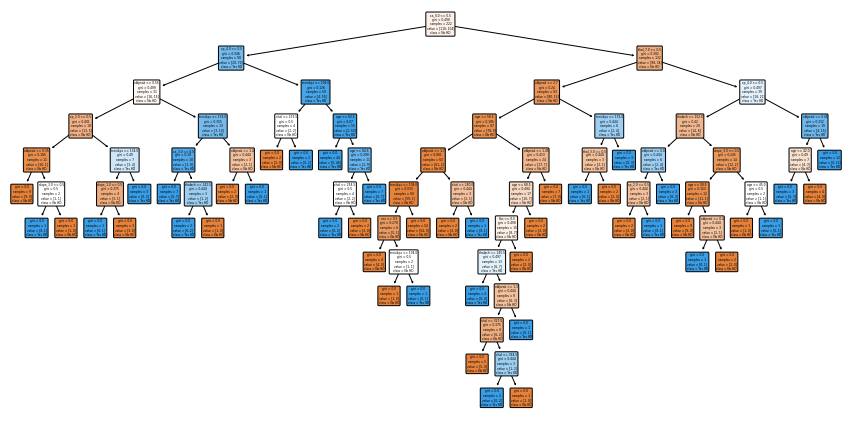

In [61]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt,
          filled=True,
          rounded=True,
          class_names=['No HD','Yes HD'],
          feature_names=X_encoded.columns)
plt.show()

ok, we have sucessfully built our Decision tree for classification, let us see how it performs on the training data set and on testing set.

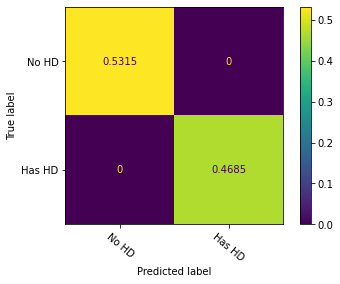

In [71]:
# plot_confusion_matrix() will run the data down the Decision tree and 
# draw a Confusion matrix
plot_confusion_matrix(clf_dt,X_train,y_train,
                      labels=None, 
                      normalize='all', 
                      display_labels=['No HD','Has HD'], 
                      include_values=True, 
                      xticks_rotation= 320.5,
                      values_format='.4g',
                      cmap='viridis'
                     )

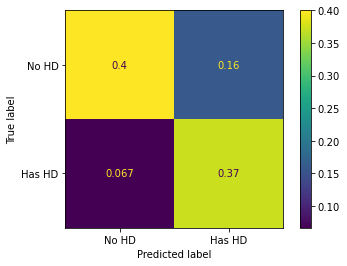

In [83]:
plot_confusion_matrix(clf_dt,
                      X_test,
                      y_test,
                      labels=None,
                      sample_weight=None,
                      normalize='all',
                      display_labels=['No HD','Has HD'],
                      include_values=True,
                      xticks_rotation='horizontal',
                      values_format=None,
                      cmap='viridis',
                      ax=None,
                     )

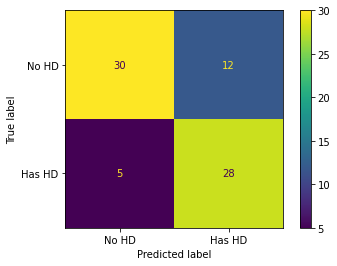

In [79]:
plot_confusion_matrix(clf_dt,
                      X_test,
                      y_test,
                      labels=None,
                      sample_weight=None,
                      normalize=None,
                      display_labels=['No HD','Has HD'],
                      include_values=True,
                      xticks_rotation='horizontal',
                      values_format=None,
                      cmap='viridis',
                      ax=None,
                     )

In [82]:
# Confusion matrix will alway map true lable son y axis and predicted lable on x axis
# confusion_matrix(y_test,clf_dt.predict(X_test)) 
confusion_matrix(clf_dt.predict(X_test),y_test) 

array([[30,  5],
       [12, 28]], dtype=int64)

As you can note from above that training data is giving 100% accuracy and test dataset is only giving 77% accuary, which is very high gap. This gap between train set and test set accuracy clearly indicates overfitting, which means the model we built is trying to memorize all the datapoints in the training dataset. Hence, the performance of the model on any other dataset is very bad.

So, let us prune the tree. pruning in theory should solve overfitting problem and give us better results.

# Cost Complexity Pruning: Visualize Alpha

Decision trees are notorious for being overfit to Training dataset, and there are lot of parameters, like max_depth and min_samples, that are designed to reduce overfitting. However, pruning a tree with Cost Complexity pruning can simplify the whole process of finding smaller tree that imporoves the accuracy with the Testing Dataset.

Pruning the Decision tree is all about finding the right value for pruning parameter, Alpha, which controls how little or how much pruning happens. One way to find the optimum value for Alpha is plot accuracy of the tree as a function of different values of Alpha. We will do this for both Training Dataset and Testing Dataset.

First let us extract the different values for Alpha that are available for this tree, and build a pruned tree for each value for alpha. 

NOTE:
We will omit the maximum value for Alpha with ccp_alphas = ccp_alphas[:-1] because it would prune all leaves, leaving us with root instead of a tree

In [84]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train) # Determine the value for alpha 
path

{'ccp_alphas': array([0.        , 0.00295295, 0.003861  , 0.00405405, 0.004095  ,
        0.00429358, 0.00578761, 0.00600601, 0.00600601, 0.00600601,
        0.00600601, 0.0063593 , 0.00667591, 0.00675676, 0.00757375,
        0.00811505, 0.00868726, 0.00889851, 0.01038181, 0.0105777 ,
        0.01422475, 0.01604051, 0.01642461, 0.02103075, 0.03680006,
        0.03934523, 0.13046216]),
 'impurities': array([0.        , 0.00885886, 0.02430287, 0.03241098, 0.04060099,
        0.04918815, 0.06655097, 0.07255697, 0.09057499, 0.102587  ,
        0.11459901, 0.13367692, 0.14035282, 0.14710958, 0.15468333,
        0.17091343, 0.17960069, 0.18849919, 0.19888101, 0.2094587 ,
        0.2379082 , 0.25394872, 0.27037333, 0.29140408, 0.32820413,
        0.36754937, 0.49801153])}

In [85]:
ccp_alphas = path.ccp_alphas    # Extract different values for Alpha
ccp_alphas

array([0.        , 0.00295295, 0.003861  , 0.00405405, 0.004095  ,
       0.00429358, 0.00578761, 0.00600601, 0.00600601, 0.00600601,
       0.00600601, 0.0063593 , 0.00667591, 0.00675676, 0.00757375,
       0.00811505, 0.00868726, 0.00889851, 0.01038181, 0.0105777 ,
       0.01422475, 0.01604051, 0.01642461, 0.02103075, 0.03680006,
       0.03934523, 0.13046216])

In [86]:
ccp_alphas = ccp_alphas[:-1]      ## Exclude the maximum value for alpha
ccp_alphas

array([0.        , 0.00295295, 0.003861  , 0.00405405, 0.004095  ,
       0.00429358, 0.00578761, 0.00600601, 0.00600601, 0.00600601,
       0.00600601, 0.0063593 , 0.00667591, 0.00675676, 0.00757375,
       0.00811505, 0.00868726, 0.00889851, 0.01038181, 0.0105777 ,
       0.01422475, 0.01604051, 0.01642461, 0.02103075, 0.03680006,
       0.03934523])

In [87]:
clf_dts = [] # create an array / empty list that will put the Decision trees into

## now create one Decision tree for each value of Alpha and store it in the array
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train,y_train)
    clf_dts.append(clf_dt)

clf_dts    # print all the decision trees built

[DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.0029529529529529544, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.003861003861003862, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.004054054054054055, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.004095004095004095, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.004293579293579285, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.005787605787605791, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.006006006006006006, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.006006006006006006, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.006006006006006006, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.006006006006006006, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.0063593004769475344, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.006675906675906675, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.006756756756756757, random_state

Now let us graph the accuracy of the trees using the Training Dataset and Testing Dataset as a function of alpha

<function matplotlib.pyplot.show(close=None, block=None)>

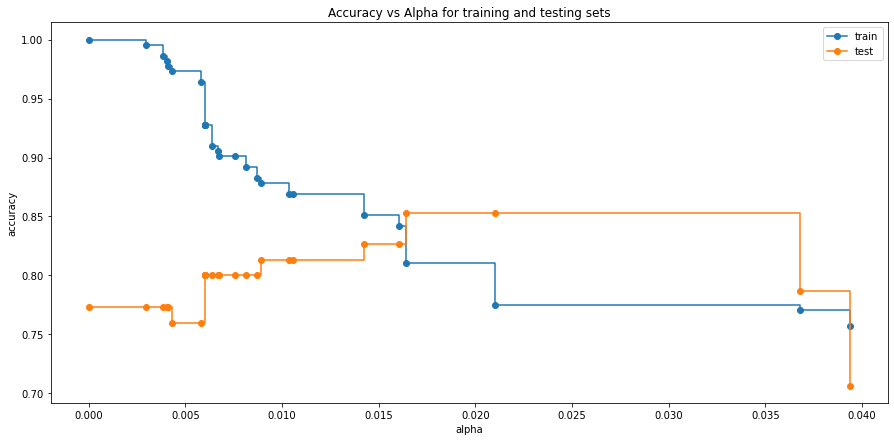

In [95]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores  = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots(figsize=(15,7))
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs Alpha for training and testing sets')
ax.plot(ccp_alphas, train_scores, marker = 'o', label = 'train', drawstyle = 'steps-post')
ax.plot(ccp_alphas, test_scores, marker = 'o', label = 'test', drawstyle = 'steps-post')
ax.legend()
plt.show

In the graph above, we see that the accuracy for the Testing Dataset hits the maximum when the alpha is about 0.016. After this value for alpha, the accuracy of the training dataset drops of off and that suggests we should set ccp_alpha = 0.016

NOTE:
When we apply Cost Complexity Pruning to a binary classification tree, values of alpha go from 0 to 1, because GINI scores go from 0 to 1. In contrast, values for alpha for a multiclass Classification will be slightly higher and the alpha values for Regression trees are the highest as sum of squared residuals can be very large, in theory they can go from 0 to infinity. 

Since there are many ways, we could have devided our training and testing sets, how do we know we used the best training set or how do we know we used the best testing dataset? or how do we know how does our model fare if there are different training and testing sets are provided? Typicaly, we answer this question by 10-fold Cross Validation. So that is what we are going to do now. We will do this with cross_val_score() function of (scikit-learn model-selection)

# Cross Complexity Pruning part 2: Cross Validation for best Alpha

The graph we just drew suggested one value for alpha, 0.016, but another set of data might suggest another value.

First, let us demonstrate that different training and testing sets results in trees with different accuracies when we set alpha = 0.016. We will do this by using cross_val_score() function to generate different training and testing datasets and train and test the tree with those datasets.

<AxesSubplot:xlabel='Tree'>

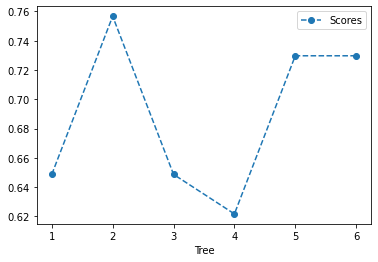

In [97]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.016) # create a tree with alpha = 0.016

# now use 6-fold cross validation to create 6 different training and testing datasets
# that are then used to train and test the tree
# NOTE: we use 6-fold because we dont have large dataset and 
# also we need minimum of 30 datapoints in the testing dataset. in this case we will have just over 50 datapoints

scores = cross_val_score(clf_dt,X_train,y_train,cv=6)
df = pd.DataFrame(data={'Tree':range(1,7), 'Scores': scores})

df.plot(x='Tree',y='Scores', marker='o',linestyle='--')

The graph above shows that using different training and testing datasets with same alphs will result in different accuracies, suggesting that alpha is sensitive to datasets. So, instead of picking single training dataset and single testing dataset, let's use the cross validation to find the optimal value for ccp_alpha.

In [102]:
# create an array to store the results for each fold during cross validation
alpha_loop_values = []

# for each candidate value for alpha, we will run 5 fold cross validation.
# Then we will store the mean and std deviation of the socres (the accuracy) for each call
# to cross_val_score in alpha_loop_values...

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt,X_train,y_train,cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
alpha_loop_values[:3]   ## print the stored values

[[0.0, 0.688989898989899, 0.07443108030751194],
 [0.0029529529529529544, 0.688989898989899, 0.07443108030751194],
 [0.003861003861003862, 0.697878787878788, 0.07779312455177388]]

<AxesSubplot:xlabel='Alpha'>

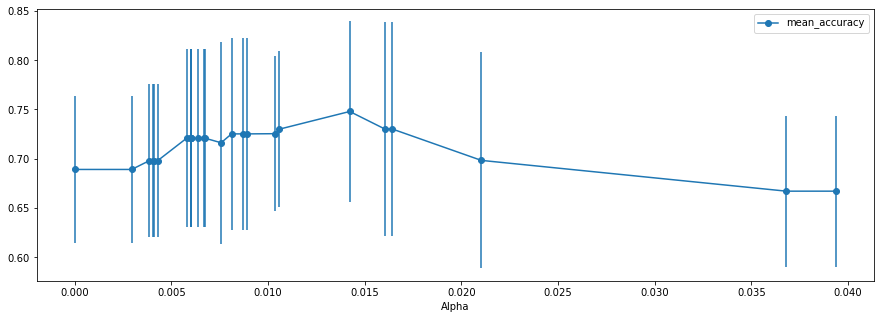

In [107]:
# now we can plot the graph for means and std deviations of score for each candidate of alpha

alpha_results = pd.DataFrame(alpha_loop_values, columns=['Alpha','mean_accuracy','std_Dev'])
f,ax = plt.subplots(1,1,figsize=(15,5))
alpha_results.plot(ax=ax,x = 'Alpha',y='mean_accuracy',yerr='std_Dev',marker = 'o', linestyle = '-')

using cross validation we see that, overall, instead of setting ccp_alpha = 0.016, we need to set it to something closer to 0.014, we can find the exact value with:

In [108]:
alpha_results[(alpha_results['Alpha'] > 0.014)
               &
              (alpha_results['Alpha'] < 0.016)]

,Alpha,mean_accuracy,std_Dev
20,0.014225,0.747778,0.091395


Now let us store the exact value for alpha so that we can use it to build the best tree.

In [110]:
ideal_ccp_value = alpha_results[(alpha_results['Alpha'] > 0.014)
                                &
                                (alpha_results['Alpha'] < 0.016)].Alpha
ideal_ccp_value

20    0.014225
Name: Alpha, dtype: float64

NOTE: At this point Python thinks that ideal_ccp_value is a series, which is a type of array. we can tell this by looking at the printed value. we have two bits of stuf. the first one 20 is index in a series, the second one, 0.014225, is the value we want. So, we can convert this from series to a float value with following command:

In [111]:
ideal_ccp_value = float(ideal_ccp_value)
ideal_ccp_value

0.014224751066856332

Wow, now let us build the final decision tree and evaluate the same.

# Building, Evaluating, Drawing, and Interpretting the final Classification Tree

In [112]:
## build and train a new decision tree, oly this time use the optimal value for alpha
clf_dt_prunned =  DecisionTreeClassifier(random_state=42,
                                         ccp_alpha=ideal_ccp_value)
clf_dt_prunned = clf_dt_prunned.fit(X_train,y_train)

Now let's draw another classification matrix to see if the prunned tree does better

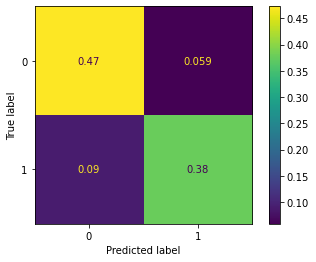

In [113]:
# confustion matrix on traing set
plot_confusion_matrix(  clf_dt_prunned,
                        X_train,
                        y_train,
                        labels=None,
                        sample_weight=None,
                        normalize='all',
                        display_labels=None,
                        include_values=True,
                        xticks_rotation='horizontal',
                        values_format=None,
                        cmap='viridis')

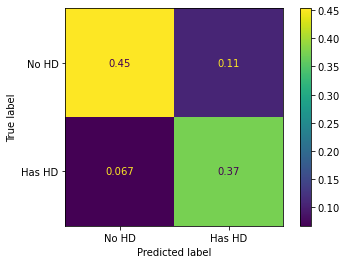

In [116]:
# confusion matrix and on testing dataset
plot_confusion_matrix(  clf_dt_prunned,
                        X_test,
                        y_test,
                        labels=None,
                        sample_weight=None,
                        normalize='all',
                        display_labels=['No HD', 'Has HD'],
                        include_values=True,
                        xticks_rotation='horizontal',
                        values_format=None,
                        cmap='viridis')

In [118]:
# corss verifying the confusion matrix
print(y_test.value_counts())
confusion_matrix(clf_dt_prunned.predict(X_test),y_test)

0    42
1    33
Name: hd, dtype: int64


array([[34,  5],
       [ 8, 28]], dtype=int64)

In [120]:
(34+28)/(42+33) ## overall accuracy of the model

0.8266666666666667

In [122]:
clf_dt_prunned.score(X_test,y_test) ## Accuracy using the scores method on the tree object

0.8266666666666667

Our over all test accuracy has improved from 77% to 82% after tuneing the hyper parameter ccp_aplha. Totla improvement of accuracy is around 5%, which is very good.

We can notice that the train accuracy has dropped from our previous model, but out test accuracy imporved which is good. now the difference between train and test accuracy is about 3%, which goes on to show that the model behaves consitently on any dataset. Hence we have solved the problem of overfitting.

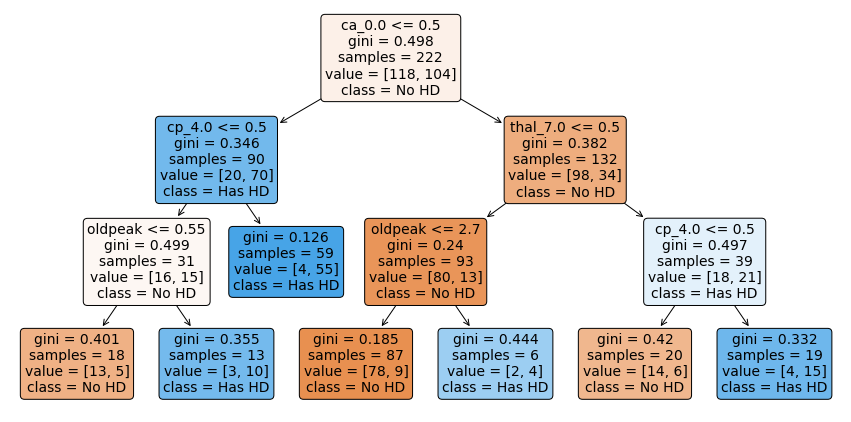

In [124]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_prunned,filled=True,rounded=True,class_names=['No HD','Has HD'],feature_names=X_encoded.columns)
plt.show()

Now, let us discuss how to interpret a tree. In each node, we have:

* The variable (column name) and threshold for splitting the observation. For example, in the tree's root, we use ca to split the observations. All observations with ca <= 0.5 (observations which satisfy the condition) will go to the left and all observation with ca > 0.5 go to the right.

* gini is the GINI index or the score for that node.

* Samples tell us how many samples (datapoints) are there in that node.
* Value tell us how many samples aer there in each category. In this example, we have two categories No and Yes, referring to whether or not a patient has heart disease. The number of patients with no comes first because the categories are ordered in ascending order of their count (same as value_counts()). Thus in the root node, 118 patients have no and 104 patients have yes in that order.

* Class tells us whichever the category represented the most in the node. in the root since 118 people have no and only 104 have yes, class is set to no. 

The leaves are just like the nodes, except that they do not contain a variable and threshold for splitting the observations

Lastly, Nodes and Leaves are colored by class in this case no is different shades of orage-ish color and yes is diferent shades of blue. The darker the shade the lower the gini score, and that tell us how much the node of leaf is skewed toward one class. 

In [128]:
y = df_no_missing.hd
y[:10]

0    0
1    2
2    1
3    0
4    0
5    0
6    3
7    0
8    2
9    1
Name: hd, dtype: int64

In [129]:
X_train,X_test,y_train,y_test = train_test_split(X_encoded,y,random_state=42)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)
print(y_train.value_counts(),'\n',y_test.value_counts())

(222, 25) (75, 25)
(222,) (75,)
0    118
1     41
2     27
3     26
4     10
Name: hd, dtype: int64 
 0    42
1    13
3     9
2     8
4     3
Name: hd, dtype: int64


In [130]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

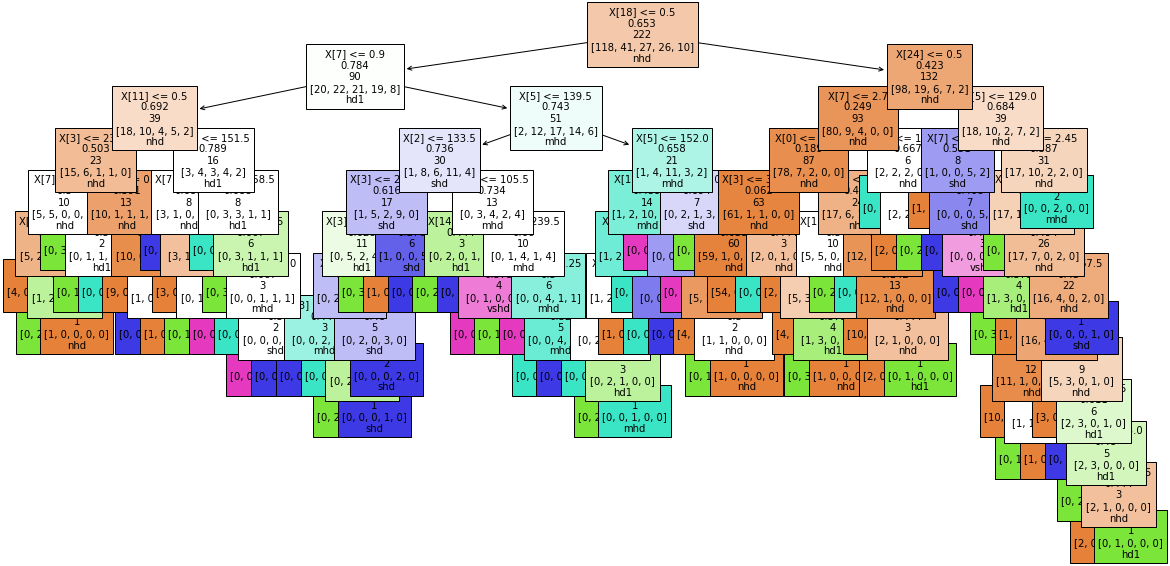

In [142]:
plt.figure(figsize=(20,10))
plot_tree(clf_dt,
            max_depth=None,
            feature_names=None,
            class_names=['nhd','hd1','mhd','shd','vshd'],
            label=None,
            filled=True,
            impurity=True,
            node_ids=False,
            proportion=False,
            rotate='deprecated',
            rounded=False,
            precision=3,
            ax=None,
            fontsize=10)
plt.show()

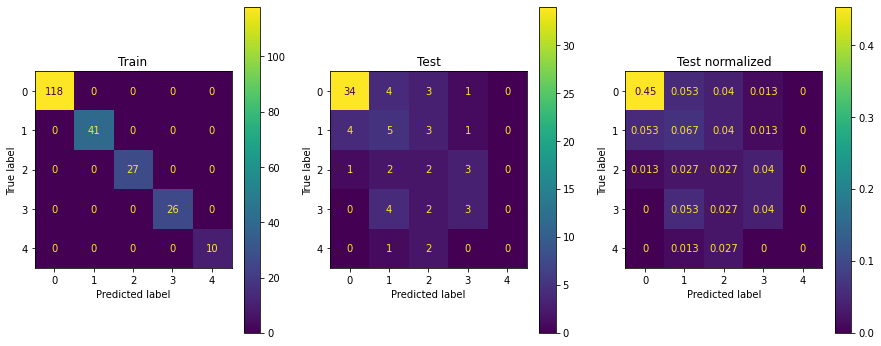

In [150]:
fig,ax = plt.subplots(1,3,figsize=(15,6))
plot_confusion_matrix(clf_dt,
                        X_train,
                        y_train,
                        labels=None,
                        sample_weight=None,
                        normalize=None,
                        display_labels=None,
                        include_values=True,
                        xticks_rotation='horizontal',
                        values_format=None,
                        cmap='viridis',
                        ax=ax[0])
ax[0].set_title('Train')
plot_confusion_matrix(clf_dt,
                        X_test,
                        y_test,
                        labels=None,
                        sample_weight=None,
                        normalize=None,
                        display_labels=None,
                        include_values=True,
                        xticks_rotation='horizontal',
                        values_format=None,
                        cmap='viridis',
                        ax=ax[1])
ax[1].set_title('Test')
plot_confusion_matrix(clf_dt,
                        X_test,
                        y_test,
                        labels=None,
                        sample_weight=None,
                        normalize='all',
                        display_labels=None,
                        include_values=True,
                        xticks_rotation='horizontal',
                        values_format=None,
                        cmap='viridis',
                        ax=ax[2])
ax[2].set_title('Test normalized')
plt.show()

In [153]:
ccp_alphas = clf_dt.cost_complexity_pruning_path(X_train,y_train).ccp_alphas # extracting alphas from Dtree
ccp_alphas = ccp_alphas[:-1] # excluding the last value as it represents no leaf
ccp_alphas

array([0.        , 0.00295295, 0.004095  , 0.00412913, 0.004158  ,
       0.00436508, 0.0045045 , 0.0045045 , 0.0045045 , 0.0045045 ,
       0.00540541, 0.00540541, 0.00540541, 0.00565566, 0.00585586,
       0.00600601, 0.00600601, 0.00600601, 0.00630631, 0.00655201,
       0.00656907, 0.00675676, 0.00675676, 0.00675676, 0.00675676,
       0.00686401, 0.00727156, 0.00750751, 0.00777151, 0.00788288,
       0.00788288, 0.00810811, 0.00831188, 0.00834488, 0.00852076,
       0.00856739, 0.00884368, 0.00900901, 0.00926641, 0.00926854,
       0.00963217, 0.00974099, 0.01020264, 0.01172127, 0.01207214,
       0.01236609, 0.01254118, 0.01902306, 0.02567047, 0.02714812])

In [156]:
clf_dts_cv = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=42,ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt,X_train,y_train,cv=6)
    clf_dts_cv.append([ccp_alpha,np.mean(scores),np.std(scores)])

clf_dts_cv[:3]

[[0.0, 0.43693693693693697, 0.05498448475555723],
 [0.0029529529529529544, 0.43693693693693697, 0.05498448475555723],
 [0.004095004095004095, 0.43693693693693697, 0.05498448475555723]]

<AxesSubplot:xlabel='Alpha'>

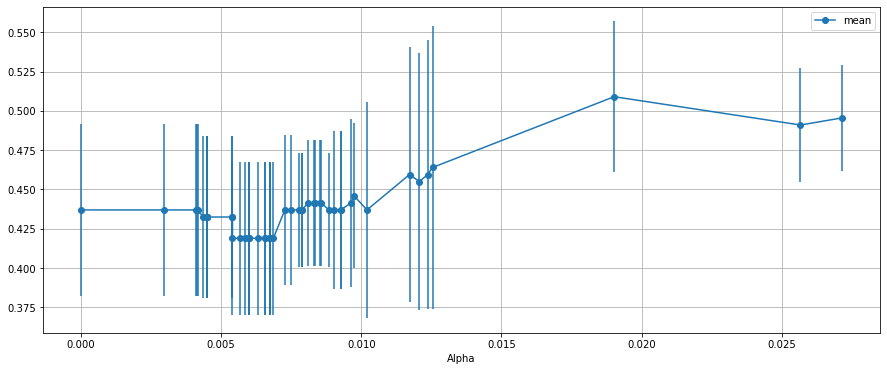

In [159]:
alpha_results = pd.DataFrame(clf_dts_cv, columns=['Alpha','mean','std'])
fig,ax = plt.subplots(1,1,figsize=(15,6))
alpha_results.plot(ax=ax,x='Alpha',y='mean',yerr='std',marker='o',linestyle='-',grid=True)

The maximum accuracy is approximately 51%, that to on one occasion, hence this an useless model we will have to discard it. Note that the decition tree prone to imbalanced datasets. 

In [162]:
ideal_ccp_value = float(alpha_results[(alpha_results.Alpha > .015) & (alpha_results.Alpha < 0.020)].Alpha)
ideal_ccp_value 

0.019023055313377904

In [163]:
clf_dt_prunned = DecisionTreeClassifier(random_state=0,ccp_alpha=ideal_ccp_value)
clf_dt_prunned.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.019023055313377904, random_state=0)

Text(0.5, 1.0, 'CF Normalized Test')

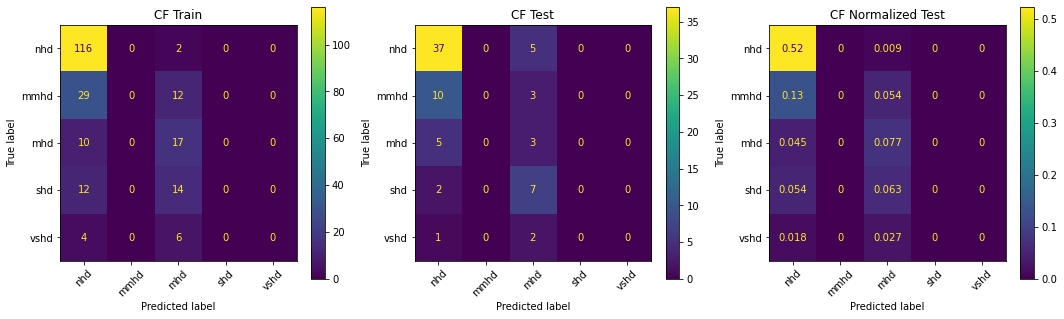

In [166]:
fig,ax = plt.subplots(1,3,figsize=(18,5))
plot_confusion_matrix(clf_dt_prunned,X_train,y_train,labels=None,
                            sample_weight=None,
                            normalize=None,
                            display_labels=['nhd','mmhd','mhd','shd','vshd'],
                            include_values=True,
                            xticks_rotation= 45,
                            values_format=None,
                            cmap='viridis',
                            ax=ax[0])
ax[0].set_title('CF Train')
plot_confusion_matrix(clf_dt_prunned,X_test,y_test,labels=None,
                            sample_weight=None,
                            normalize=None,
                            display_labels=['nhd','mmhd','mhd','shd','vshd'],
                            include_values=True,
                            xticks_rotation= 45,
                            values_format=None,
                            cmap='viridis',
                            ax=ax[1])
ax[1].set_title('CF Test')
plot_confusion_matrix(clf_dt_prunned,X_train,y_train,labels=None,
                            sample_weight=None,
                            normalize='all',
                            display_labels=['nhd','mmhd','mhd','shd','vshd'],
                            include_values=True,
                            xticks_rotation= 45,
                            values_format=None,
                            cmap='viridis',
                            ax=ax[2])
ax[2].set_title('CF Normalized Test')

In [167]:
y_train.value_counts()

0    118
1     41
2     27
3     26
4     10
Name: hd, dtype: int64

In [168]:
confusion_matrix(y_train,clf_dt_prunned.predict(X_train))

array([[116,   0,   2,   0,   0],
       [ 29,   0,  12,   0,   0],
       [ 10,   0,  17,   0,   0],
       [ 12,   0,  14,   0,   0],
       [  4,   0,   6,   0,   0]], dtype=int64)

In [169]:
clf_dt_prunned.score(X_train,y_train), clf_dt_prunned.score(X_test,y_test)

(0.5990990990990991, 0.5333333333333333)

# The accuracy on test has imporved from 51% to 53% however this is not a good accuracy.